In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
import seaborn as sns
import warnings
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma

warnings.filterwarnings('ignore')

In [135]:
diabetes_df = pd.read_csv("/Users/habiba/Downloads/diabetes.csv.xls")
diabetes_df.shape
diabetes_df['HIGH'] = (diabetes_df.Glucose >= 150).astype('int')
diabetes_df['LOW'] = (diabetes_df.Glucose <= 80).astype('int')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HIGH,LOW
0,6,148,72,35,0,33.6,0.627,50,1,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0
5,5,116,74,0,0,25.6,0.201,30,0,0,0
6,3,78,50,32,88,31.0,0.248,26,1,0,1
7,10,115,0,0,0,35.3,0.134,29,0,0,0
8,2,197,70,45,543,30.5,0.158,53,1,1,0
9,8,125,96,0,0,0.0,0.232,54,1,0,0


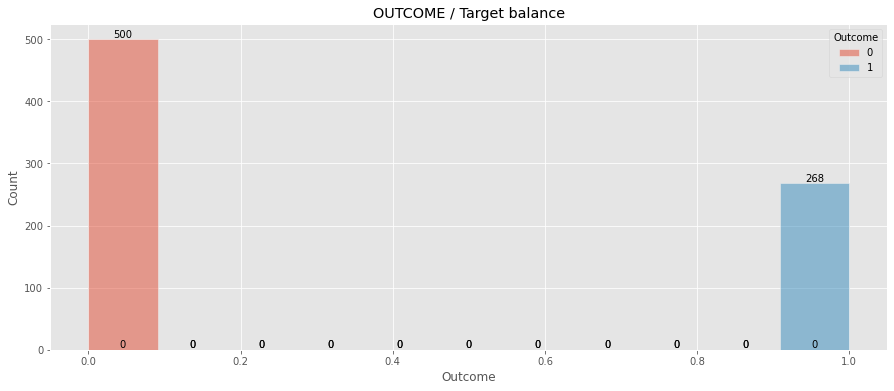

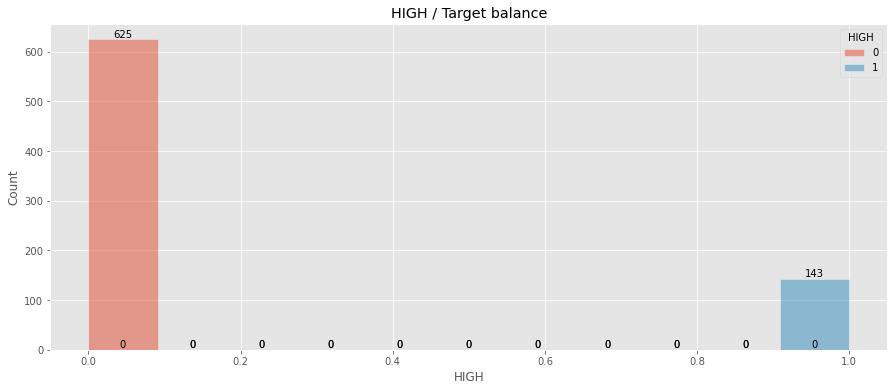

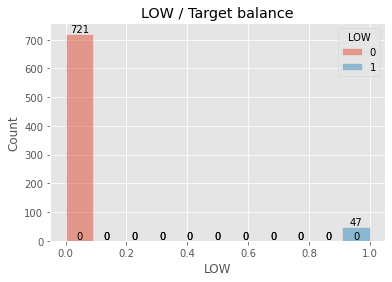

In [137]:
#DIA = diabetes_df['Outcome'].head(10)
#LEVEL_H = df['HIGH'].head(10)
#LEVEL_L = df['LOW'].head(10)
#LEVEL_N = df['NORMAL'].head(10)
# plotting graph
#plt.xlabel('Outcome')
#plt.ylabel('HIGH')
#plt.bar(DIA, LEVEL_H, color='green', width=0.4)
plt.figure(figsize=(15,6))
ax =sns.histplot(data=diabetes_df,x='Outcome',hue='Outcome')
for i in ax.containers:
     ax.bar_label(i)
plt.title('OUTCOME / Target balance')
plt.show()
plt.figure(figsize=(15,6))
ax2 =sns.histplot(data=diabetes_df,x='HIGH',hue='HIGH')
for i in ax2.containers:
    ax2.bar_label(i)
plt.title('HIGH / Target balance')
plt.show()
ax3 =sns.histplot(data=diabetes_df.,x='LOW',hue='LOW')
for i in ax3.containers:
    ax3.bar_label(i)
plt.title('LOW / Target balance')
plt.show()

# display plot
#plt.show()
#plt.figure(figsize=(15,6))
#ax =sns.histplot(data=diabetes_df,x='Outcome',hue='LOW')
plt.show()
#diabetes_df.plot(x="Outcome", y="LOW")
#plt.show()

In [118]:
diabetes_df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HIGH,LOW,NORMAL
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.186198,0.061198,0.752604
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.389520,0.239849,0.431780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,0.000000,0.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
zero_values_columns = diabetes_df.iloc[:,1:6]
zero_values_columns.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


Percentage: 0.65
No. of missing values: 5 



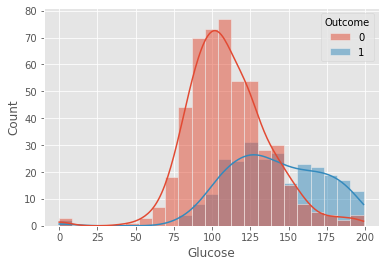

In [33]:
def missing_per(var):
    print('Percentage:',round((zero_values_columns[zero_values_columns[var] == 0].shape[0])/(zero_values_columns.shape[0])*100,ndigits=2))
    print('No. of missing values:',zero_values_columns[zero_values_columns[var] == 0].shape[0],'\n')
    sns.histplot(x='Glucose',data=zero_values_columns,kde=True,hue=diabetes_df['Outcome'])
missing_per('Glucose')

Percentage: 4.56
No. of missing values: 35 



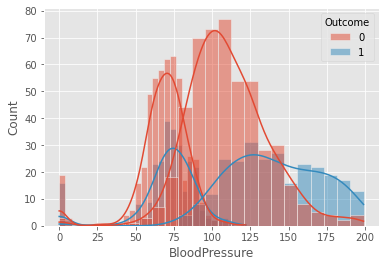

In [34]:
sns.histplot(x='BloodPressure',data=zero_values_columns,kde='True',color='green',hue=diabetes_df['Outcome'])
missing_per('BloodPressure')

Percentage: 29.56
No. of missing values: 227 



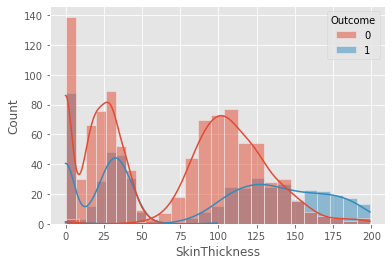

In [35]:
sns.histplot(x='SkinThickness',data=zero_values_columns,kde=True,color='k',hue=diabetes_df['Outcome'])
missing_per('SkinThickness')

Percentage: 48.7
No. of missing values: 374 



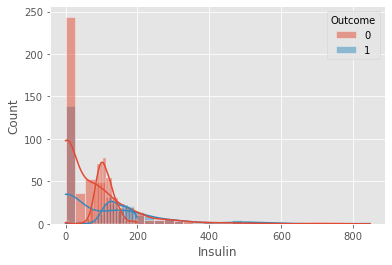

In [36]:
sns.histplot(x='Insulin',data=zero_values_columns,kde=True,color='purple',hue=diabetes_df['Outcome'])
missing_per('Insulin')

Percentage: 1.43
No. of missing values: 11 



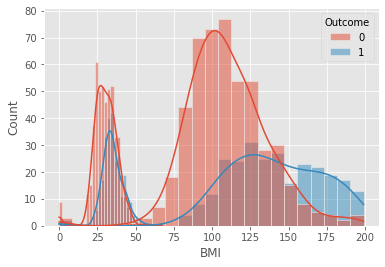

In [37]:
sns.histplot(x='BMI',data=zero_values_columns,kde=True,color='darkgreen',hue=diabetes_df['Outcome'])
missing_per('BMI')

<AxesSubplot:>

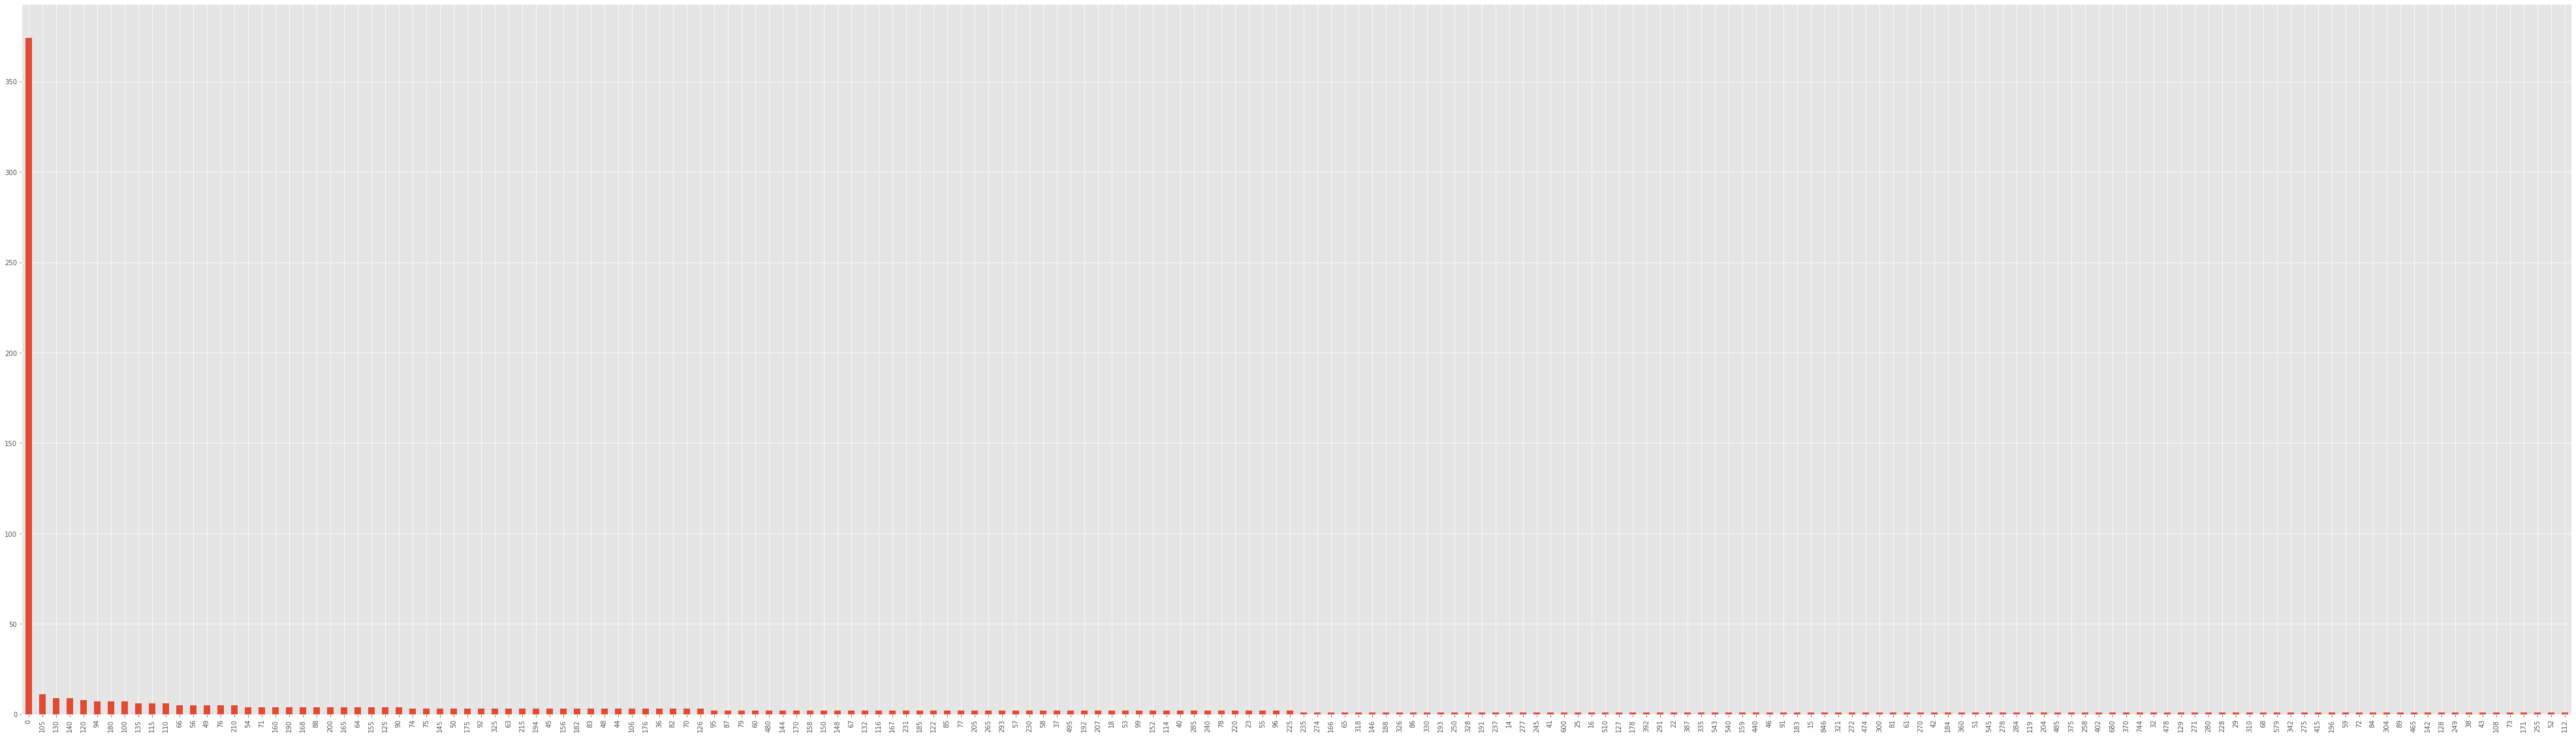

In [38]:
plt.figure(figsize=(70,20))
diabetes_df['Insulin'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Treated'}, xlabel='SkinThickness', ylabel='Count'>

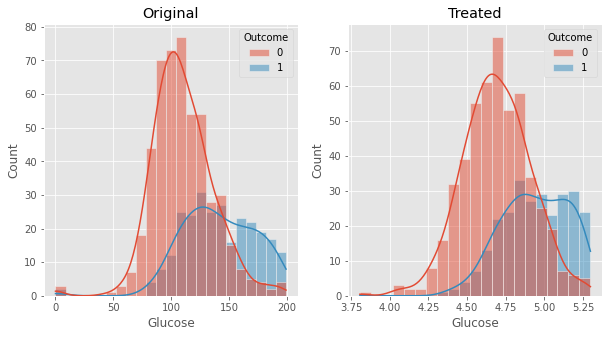

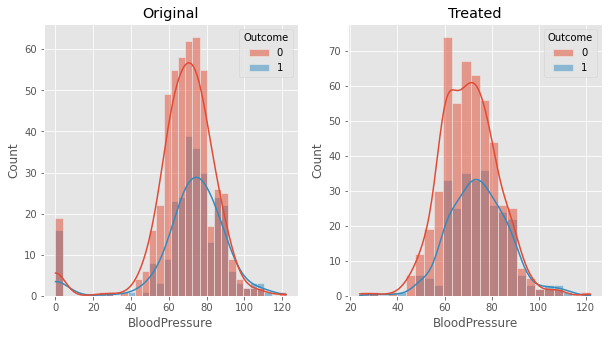

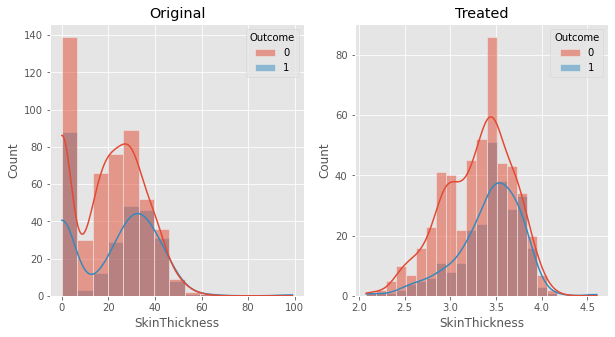

In [39]:
diabetes_df['Glucose'].replace(0,117,inplace=True)
diabetes_df['Glucose'] = np.log1p(diabetes_df['Glucose'])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='Glucose',data=zero_values_columns,kde=True,hue=diabetes_df['Outcome'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Glucose',kde=True,data=diabetes_df,hue='Outcome')
diabetes_df['BloodPressure'].replace(0,60,inplace=True)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='BloodPressure',data=zero_values_columns,kde=True,hue=diabetes_df['Outcome'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='BloodPressure',data=diabetes_df,kde=True,hue='Outcome')
diabetes_df['SkinThickness'].replace(0,np.nan,inplace=True)
diabetes_df['SkinThickness'].fillna(method='ffill',inplace=True)
diabetes_df['SkinThickness'] = np.log1p(diabetes_df['SkinThickness'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='SkinThickness',data=zero_values_columns,kde=True,hue=diabetes_df['Outcome'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='SkinThickness',data=diabetes_df,kde=True,hue='Outcome')

<AxesSubplot:title={'center':'Treated'}, xlabel='Age', ylabel='Count'>

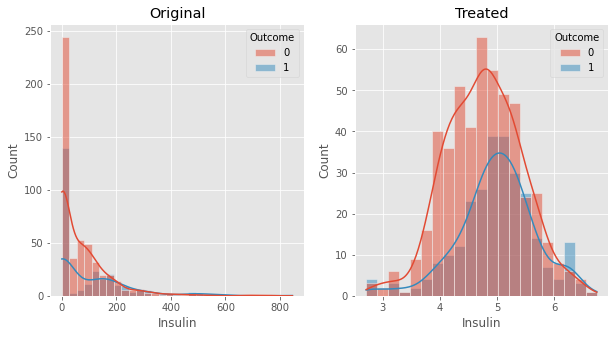

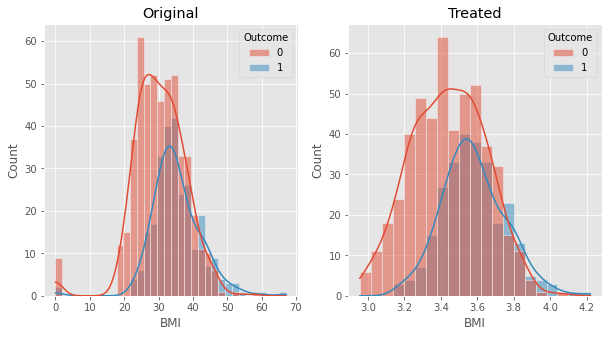

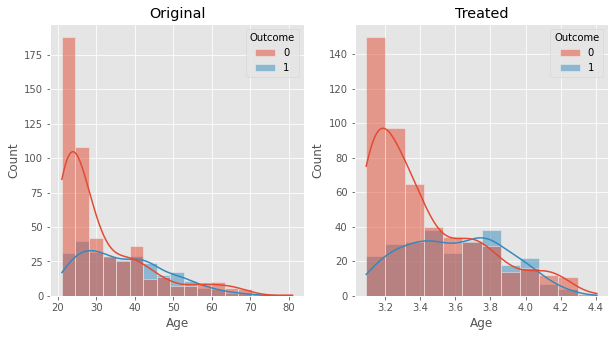

In [40]:
diabetes_df['Insulin'] = np.log1p(diabetes_df['Insulin'])

diabetes_df['Insulin'].replace(0,np.nan,inplace=True)
diabetes_df['Insulin'].fillna(method='ffill',inplace=True)
diabetes_df['Insulin'].fillna(method='bfill',inplace=True)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='Insulin',data=zero_values_columns,kde=True,hue=diabetes_df['Outcome'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Insulin',data=diabetes_df,kde=True,hue='Outcome')
diabetes_df['BMI'].replace(0,30,inplace=True)
diabetes_df['BMI'] = np.log1p(diabetes_df['BMI'])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='BMI',data=zero_values_columns,kde=True,hue=diabetes_df['Outcome'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='BMI',data=diabetes_df,kde=True,hue='Outcome')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='Age',data=diabetes_df,kde=True,hue='Outcome')
diabetes_df['Age'] = np.log1p(diabetes_df['Age'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Age',data=diabetes_df,kde=True,hue='Outcome')

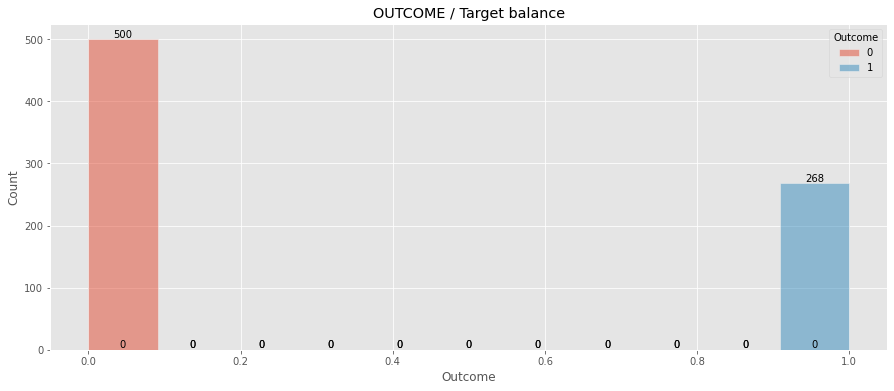

In [41]:
plt.figure(figsize=(15,6))
ax =sns.histplot(data=diabetes_df,x='Outcome',hue='Outcome')
for i in ax.containers:
    ax.bar_label(i)
plt.title('OUTCOME / Target balance')
plt.show()

In [42]:
no_dbs = diabetes_df[diabetes_df['Outcome'] == 0]
dbs = diabetes_df[diabetes_df['Outcome'] == 1]

print('1: %people with diabetes:    ',round(dbs.shape[0]/diabetes_df.shape[0]*100,ndigits=2))
print('0: %people not with diabetes:',round(no_dbs.shape[0]/diabetes_df.shape[0]*100,ndigits=2))

1: %people with diabetes:     34.9
0: %people not with diabetes: 65.1


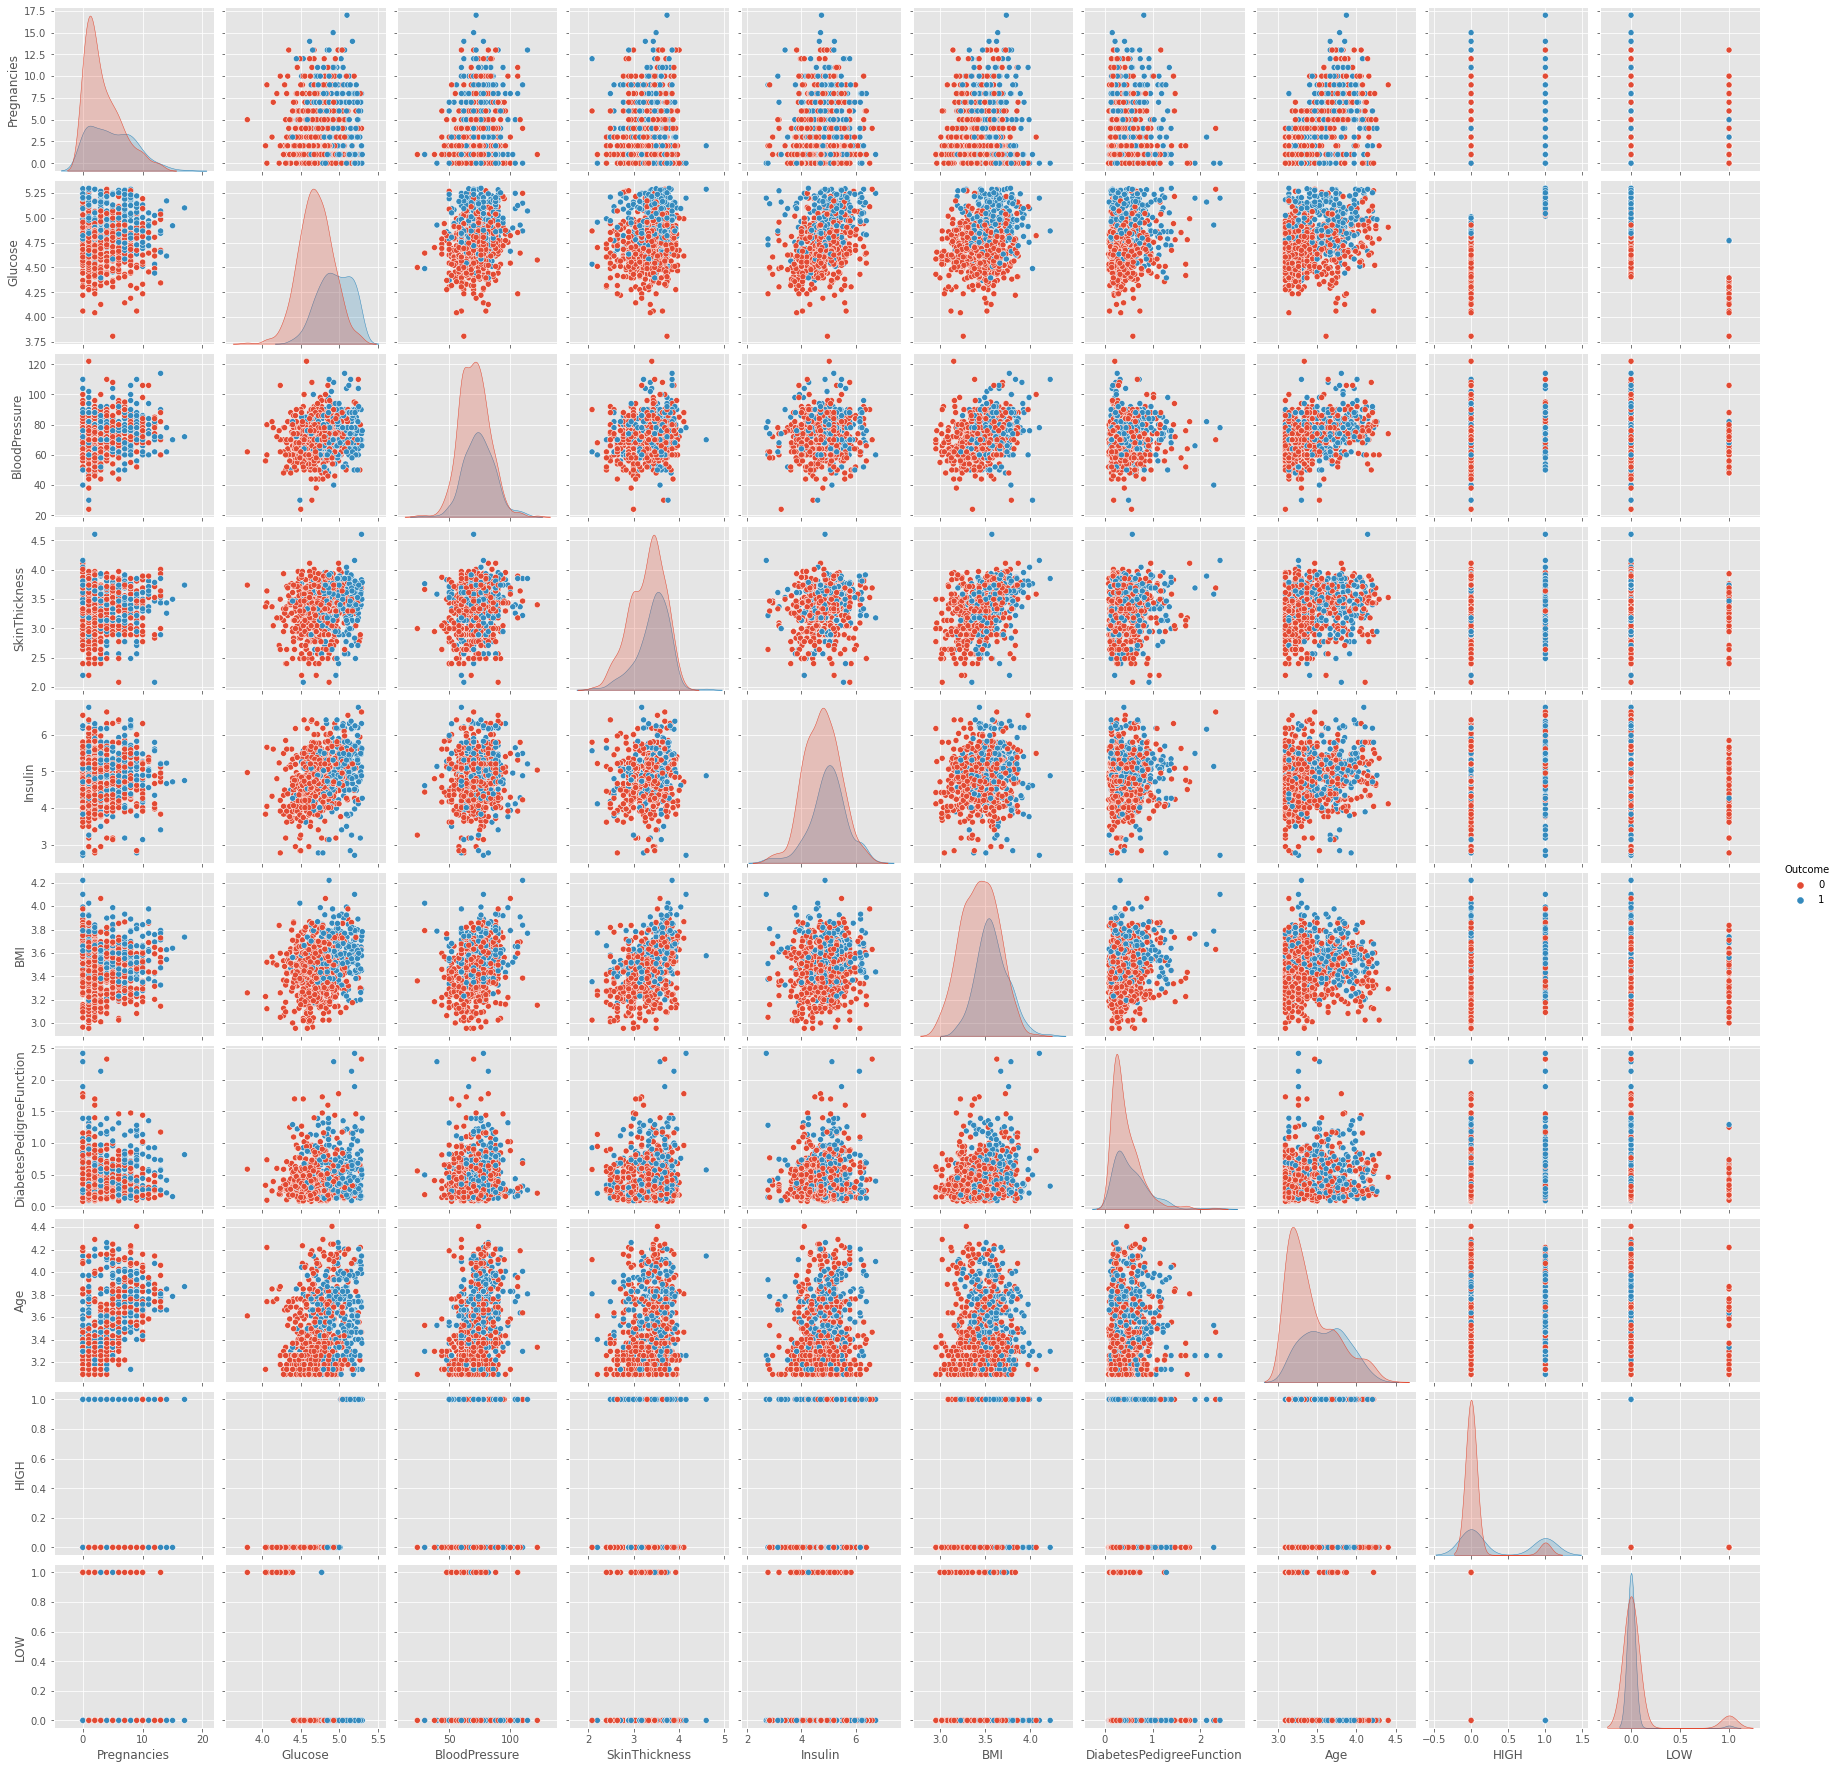

In [43]:
sns.pairplot(diabetes_df,hue='Outcome')
plt.show()

In [45]:
diabetes_df.corrwith(diabetes_df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.481991
HIGH                        0.393691
BMI                         0.322068
Age                         0.274247
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
SkinThickness               0.165982
Insulin                     0.158483
BloodPressure               0.152016
LOW                        -0.141335
dtype: float64

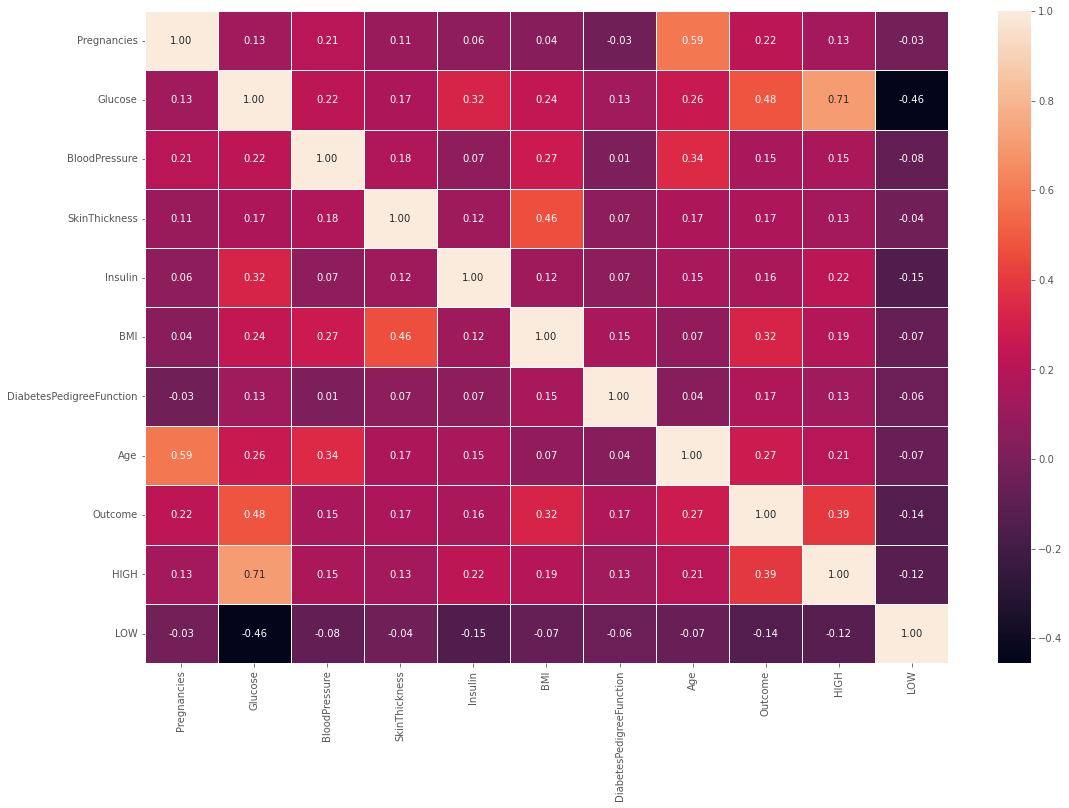

In [46]:
plt.figure(figsize=(18,12))
sns.heatmap(diabetes_df.corr(),fmt='.2f',annot=True,linecolor='white',linewidths=0.5)
plt.show()

In [47]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HIGH,LOW
0,6,5.003946,72,3.583519,4.553877,3.543854,0.627,3.931826,1,0,0
1,1,4.454347,66,3.401197,4.553877,3.317816,0.351,3.465736,0,0,0
2,8,5.214936,64,3.401197,4.553877,3.190476,0.672,3.496508,1,1,0
3,1,4.499810,66,3.178054,4.553877,3.370738,0.167,3.091042,0,0,0
4,0,4.927254,40,3.583519,5.129899,3.786460,2.288,3.526361,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,4.624973,76,3.891820,5.198497,3.523415,0.171,4.158883,0,0,0
764,2,4.812184,70,3.332205,5.198497,3.632309,0.340,3.332205,0,0,0
765,5,4.804021,72,3.178054,4.727388,3.303217,0.245,3.433987,0,0,0
766,1,4.844187,60,3.178054,4.727388,3.437208,0.349,3.871201,1,0,0


In [48]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
HIGH                        0
LOW                         0
dtype: int64

In [49]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
 9   HIGH                      768 non-null    int64  
 10  LOW                       768 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 66.1 KB


In [50]:
print(diabetes_df.info())
diabetes_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
 9   HIGH                      768 non-null    int64  
 10  LOW                       768 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 66.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HIGH,LOW
0,6,5.003946,72,3.583519,4.553877,3.543854,0.627,3.931826,1,0,0
1,1,4.454347,66,3.401197,4.553877,3.317816,0.351,3.465736,0,0,0
2,8,5.214936,64,3.401197,4.553877,3.190476,0.672,3.496508,1,1,0
3,1,4.499810,66,3.178054,4.553877,3.370738,0.167,3.091042,0,0,0
4,0,4.927254,40,3.583519,5.129899,3.786460,2.288,3.526361,1,0,0
5,5,4.762174,74,3.583519,5.129899,3.280911,0.201,3.433987,0,0,0
6,3,4.369448,50,3.496508,4.488636,3.465736,0.248,3.295837,1,0,1


In [51]:
y = diabetes_df.pop('Outcome')
X = diabetes_df

In [52]:
print(f'X: {X.shape}\ny: {y.shape}')

X: (768, 10)
y: (768,)


In [53]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mmscaler = MinMaxScaler()
sscaler = StandardScaler()

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,max_leaf_nodes=15,n_estimators=100,class_weight='balanced_subsample')
srfc = RandomForestClassifier(max_depth=5,max_leaf_nodes=7,n_estimators=100,class_weight='balanced',ccp_alpha=0.01)

In [55]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
rus.fit(X,y)
X_resampled,y_resampled = rus.fit_resample(X,y)
sX_resampled = mmscaler.fit_transform(X_resampled)

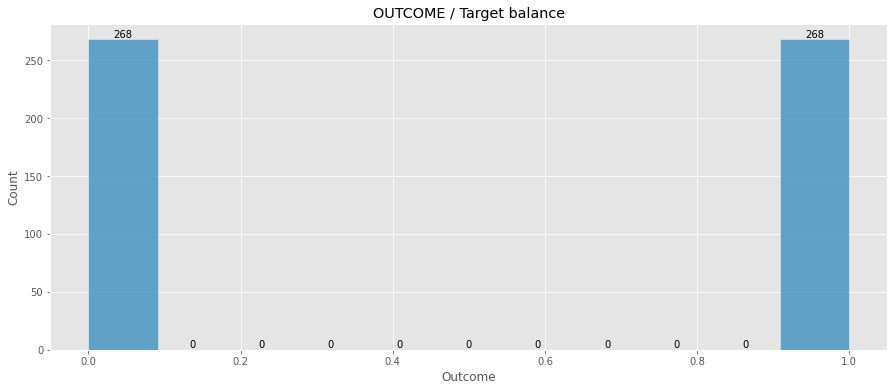

In [56]:
plt.figure(figsize=(15,6))
ax=sns.histplot(data=y_resampled,stat='count')
for i in ax.containers:
    ax.bar_label(i)
plt.title('OUTCOME / Target balance')
plt.show()

In [57]:
def vizr(unscaled_set, scaled_set):
    plt.figure(figsize=(20,10))
    # ACCURACY UNSCALED PLOT 1
    plt.subplot(2,4,1)
    plt.plot(unscaled_set['test_accuracy'],label='Test')
    plt.plot(unscaled_set['train_accuracy'],label='Train')
    plt.title('Accuracy Unscaled')
    plt.legend()
    # ACCURACY SCALED PLOT 2
    plt.subplot(2,4,2)
    plt.plot(scaled_set['test_accuracy'],label='Test')
    plt.plot(scaled_set['train_accuracy'],label='Train')
    plt.title('Accuracy Scaled')
    plt.legend()
    # F1 UNSCALED PLOT 3
    plt.subplot(2,4,3)
    plt.plot(unscaled_set['test_f1'],label='Test')
    plt.plot(unscaled_set['train_f1'],label='Train')
    plt.title('f1 score Unscaled')
    plt.legend()
    # F1 SCALED PLOT 4
    plt.subplot(2,4,4)
    plt.plot(scaled_set['test_f1'],label='Test')
    plt.plot(scaled_set['train_f1'],label='Train')
    plt.title('f1 score Scaled')
    plt.legend()
    # RECALL UNSCALED PLOT 5
    plt.subplot(2,4,5)
    plt.plot(unscaled_set['test_recall'],label='Test')
    plt.plot(unscaled_set['train_recall'],label='Train')
    plt.title('Recall Unscaled')
    plt.legend()
    # RECALL SCALED PLOT 6
    plt.subplot(2,4,6)
    plt.plot(scaled_set['test_recall'],label='Test')
    plt.plot(scaled_set['train_recall'],label='Train')
    plt.title('Recall Scaled')
    plt.legend()
    # PRECISION UNSCALED PLOT 7
    plt.subplot(2,4,7)
    plt.plot(unscaled_set['test_precision'],label='Test')
    plt.plot(unscaled_set['train_precision'],label='Train')
    plt.title('Precision Unscaled')
    plt.legend()
    # PRECISION SCALED PLOT 8
    plt.subplot(2,4,8)
    plt.plot(scaled_set['test_precision'],label='Test')
    plt.plot(scaled_set['train_precision'],label='Train')
    plt.title('Precision Scaled')
    plt.legend()
   
    plt.tight_layout()

In [58]:
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.metrics import confusion_matrix

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,max_leaf_nodes=15,n_estimators=100,class_weight='balanced_subsample')
srfc = RandomForestClassifier(max_depth=5,max_leaf_nodes=7,n_estimators=100,class_weight='balanced',ccp_alpha=0.01)

  Mean accuracy score:  75.74
  Mean f1 score:        76.01
  Mean recall score:    76.48
  Mean precision score: 75.77


{'fit_time': array([0.19154215, 0.14744091, 0.1475091 , 0.15298223, 0.15563893]),
 'score_time': array([0.0131979 , 0.01296306, 0.01280904, 0.01267767, 0.01255417]),
 'test_accuracy': array([0.78703704, 0.77570093, 0.68224299, 0.81308411, 0.72897196]),
 'train_accuracy': array([0.85280374, 0.85547786, 0.86946387, 0.85780886, 0.85081585]),
 'test_f1': array([0.77669903, 0.76923077, 0.69642857, 0.81481481, 0.74336283]),
 'train_f1': array([0.85842697, 0.85581395, 0.87214612, 0.8591224 , 0.85520362]),
 'test_recall': array([0.74074074, 0.75471698, 0.73584906, 0.81481481, 0.77777778]),
 'train_recall': array([0.89252336, 0.85581395, 0.88837209, 0.86915888, 0.88317757]),
 'test_precision': array([0.81632653, 0.78431373, 0.66101695, 0.81481481, 0.71186441]),
 'train_precision': array([0.82683983, 0.85581395, 0.85650224, 0.84931507, 0.82894737])}

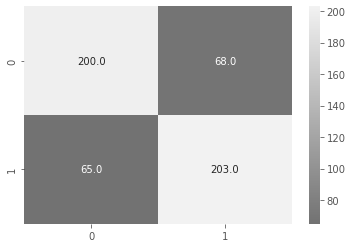

In [60]:
rfc_CV = cross_validate(rfc,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(rfc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(rfc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(rfc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(rfc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
rfc_pred = cross_val_predict(rfc,X_resampled, y_resampled, cv=5)
rfc_conf = confusion_matrix(y_resampled, rfc_pred)
sns.heatmap(rfc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
rfc_CV

  Mean accuracy score:  75.0
  Mean f1 score:        75.36
  Mean recall score:    76.11
  Mean precision score: 74.76


{'fit_time': array([0.15426612, 0.14455914, 0.14706993, 0.14864707, 0.14059806]),
 'score_time': array([0.01230717, 0.011868  , 0.01217771, 0.012362  , 0.0124321 ]),
 'test_accuracy': array([0.76851852, 0.76635514, 0.65420561, 0.80373832, 0.75700935]),
 'train_accuracy': array([0.87149533, 0.85547786, 0.87412587, 0.86480186, 0.86247086]),
 'test_f1': array([0.76190476, 0.76635514, 0.67256637, 0.80373832, 0.76363636]),
 'train_f1': array([0.87471526, 0.85972851, 0.87614679, 0.86635945, 0.86621315]),
 'test_recall': array([0.74074074, 0.77358491, 0.71698113, 0.7962963 , 0.77777778]),
 'train_recall': array([0.89719626, 0.88372093, 0.88837209, 0.87850467, 0.89252336]),
 'test_precision': array([0.78431373, 0.75925926, 0.63333333, 0.81132075, 0.75      ]),
 'train_precision': array([0.85333333, 0.83700441, 0.86425339, 0.85454545, 0.84140969])}

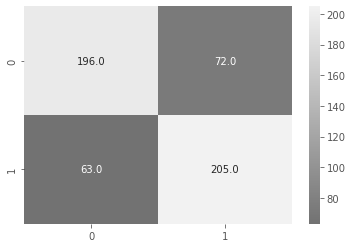

In [61]:
rfc_CV = cross_validate(rfc,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(rfc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(rfc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(rfc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(rfc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
rfc_pred = cross_val_predict(rfc,X_resampled, y_resampled, cv=5)
rfc_conf = confusion_matrix(y_resampled, rfc_pred)
sns.heatmap(rfc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
rfc_CV